In [1]:
from vcat import ImageData

2025-05-19 10:56:55,807 - INFO - vcat - Logging initialized. Log file: Console only
2025-05-19 10:56:55,807 - INFO - vcat - Using config file VCAT_CONFIG=/home/flep98/VCAT/vcat/config.yaml
2025-05-19 10:56:55,807 - INFO - vcat - Using DIFMAP Path: /usr/local/difmap/uvf_difmap_2.5g/
2025-05-19 10:56:55,808 - INFO - vcat - Using uv-weighting: [0, -1]
2025-05-19 10:56:55,808 - INFO - vcat - Using font: Quicksand
2025-05-19 10:56:55,808 - INFO - vcat - Using noise method: Histogram Fit
2025-05-19 10:56:55,809 - INFO - vcat - Using modelfit error method: Schinzel12
2025-05-19 10:56:55,809 - INFO - vcat - Using resolution limit method: Kovalev05


Thank you for using VCAT. Have fun with VLBI!
If you are using this package please cite VCAT Team et al. 2025 ....



Image of the source 3C111 at frequency 8.4 GHz on 2014-05-08 
    Total cleaned flux: 3815.199 mJy 
    Image Noise: 0.246 mJy using method 'Histogram Fit'
No polarization data loaded.
No model loaded. Clean model info: 
    Model Flux: 3815.199 mJy 
    Number of Components: 1555


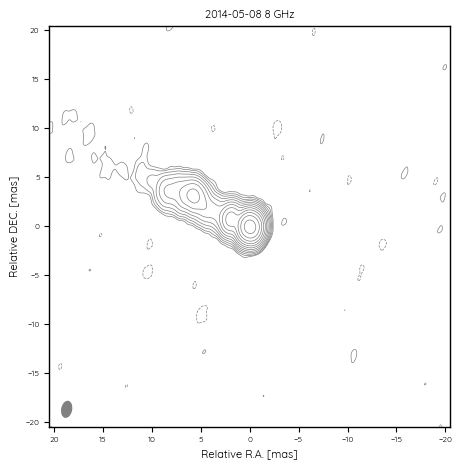

In [2]:
#Let's load some data
data=ImageData("../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.fits", #Stokes I Fits
               "../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.uvf", #uvf file (not necessary, but better)
              difmap_path="/usr/local/difmap/uvf_difmap_2.5g") #uvf file (not necessary, but better)

#get some info and plot it
print(data)
data.plot()

2025-05-19 10:57:42,800 - INFO - vcat - Automatically determined jet direction 63.0°.


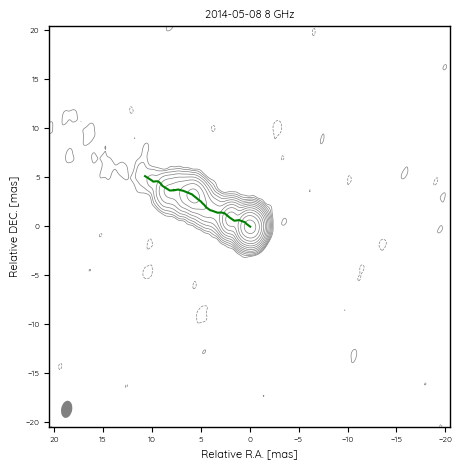

In [3]:
#There are currently two methods implemented to derive a ridgeline
#Let's start with the "slices" method which will rotate the jet to the y-axis and then performs an analysis on each horizontal pixelslice
#Note that this method might not work for strongly bent jets

#To get the ridgeline we can do
ridgeline, _ = data.get_ridgeline(method="slices")

#this operation will automatically attach the new ridgeline to the ImageData object (data.ridgeline), so we can immediately plot it
data.plot(plot_ridgeline=True,ridgeline_color="green")

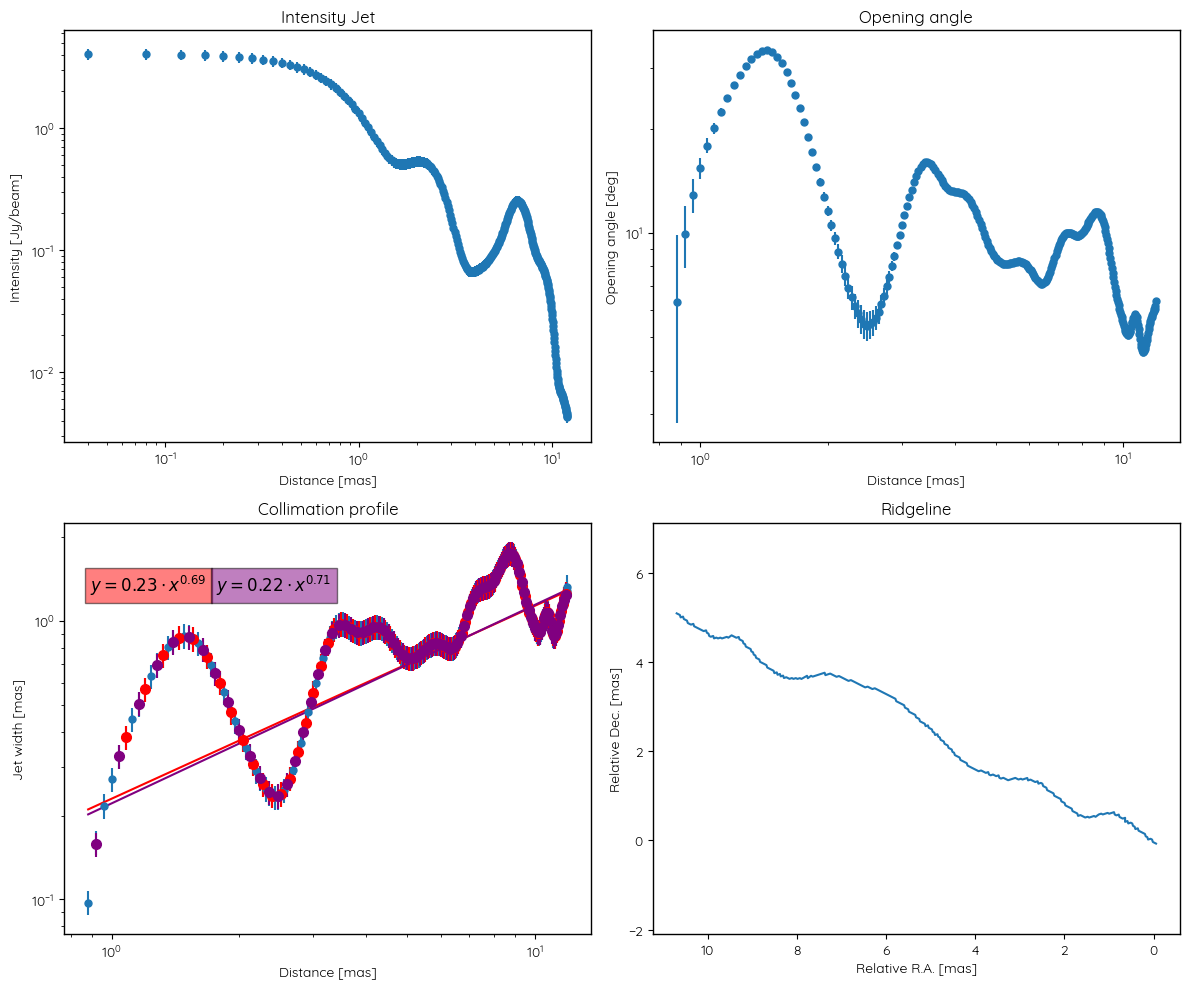

In [4]:
#The ridgeline itself has some useful plot methods that can be used as follows:

#For better visibility, we will arrange them in a 2x2 subplot grid using matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(12,10))

#Flux profile
ridgeline.plot("intensity",fig=fig,ax=ax[0,0],show=False)

#opening angle
ridgeline.plot("open_angle",fig=fig,ax=ax[0,1],show=False)

#jet width/collimation profile, including fits
ridgeline.plot("width",fig=fig,ax=ax[1,0],fit=True,show=False)

#ridgeline itself
ridgeline.plot("ridgeline",fig=fig,ax=ax[1,1],show=False)

#and finally display all the plots
plt.tight_layout()
plt.show()


#Note that all of these values are also accesible manually, if you prefer doing your own custom plots
open_angle=data.ridgeline.open_angle #.width, .dist, .intensity, .X_ridg, .Y.ridg

/home/flep98/VCAT/vcat/image_data.py:1393: UserWarning: Could not rotate polarization, probably not loaded.
  warnings.warn("Could not rotate polarization, probably not loaded.", UserWarning)
/home/flep98/VCAT/vcat/image_data.py:1393: UserWarning: Could not rotate polarization, probably not loaded.
  warnings.warn("Could not rotate polarization, probably not loaded.", UserWarning)


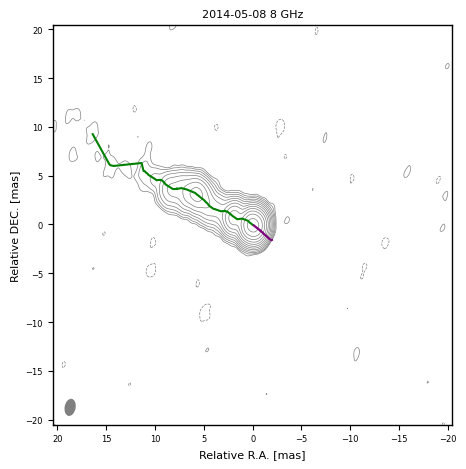

In [5]:
#If the automatic detection does not work, we can choose to manually provide the jet angle
jet_angle=63
auto_rotate=False
#additionally, we also want to find the counterjet, this is possible by setting
counterjet=True

#Additionally we can apply some cuts for the fits
cut_radial=3.0 #signal-to-noise cut for pixels to consider in the fit
cut_final=5.0 #signal-to-noise cut for the final peak flux

#And adjust the final chi-squared value which is used to determine good fits for the width and opening angle
chi_sq_val=100.0

#Let's do the fit again including counterjet
ridgeline, counter_ridgeline = data.get_ridgeline("slices",counterjet=counterjet,jet_angle=jet_angle,auto_rotate=auto_rotate,
                                                  cut_radial=cut_radial,cut_final=cut_final,chi_sq_val=chi_sq_val)

#and plot the data including the counterjet
data.plot(plot_ridgeline=True,ridgeline_color="green",plot_counter_ridgeline=True,counter_ridgeline_color="purple")

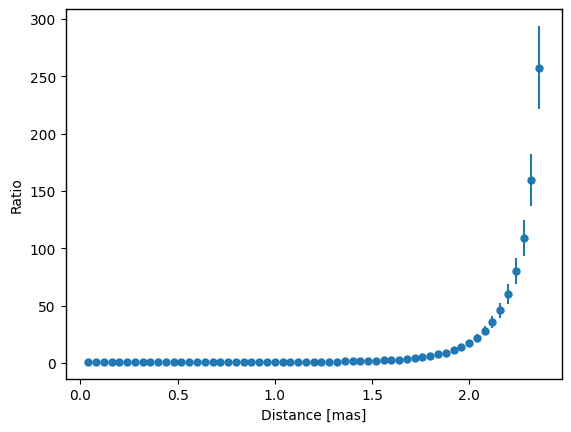

In [6]:
#if there is a counterjet ridgeline and a jet ridgeline defined, we can plot the jet to counterjet profile
data.jet_to_counterjet_profile()

2025-05-19 12:19:35,026 - INFO - vcat - will apply shift (x,y): [-0.0800000001891 : -0.0800000001891] mas
/home/flep98/VCAT/vcat/ridgeline.py:64: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
2025-05-19 12:20:22,160 - INFO - vcat - The chi_square_red is = 27.614519781597966
2025-05-19 12:20:22,174 - INFO - vcat - The chi_square_red is = 30.527048626917328
2025-05-19 12:20:22,176 - INFO - vcat - The chi_square_red is = 115.89347802292322
2025-05-19 12:20:22,178 - INFO - vcat - The chi_square_red is = 116.03653253627304
2025-05-19 12:20:22,180 - INFO - vcat - The chi_square_red is = 116.22455950232276
2025-05-19 12:20:22,182 - INFO - vcat - The chi_square_red is = 116.4538926212178
2025-05-19 12:20:22,184 - INFO - vcat - The chi_square_red is = 116.7555483996216
2025-05-19 12:20:22,186 - INFO - vcat - The chi_square_red is = 117.20704492826415
2025-05-19 12:20:22,188 - INFO - vcat - The chi_square_red is = 117.82673489846638
2025-05-19 12:20:22,192 - I

2025-05-19 12:20:22,329 - INFO - vcat - The chi_square_red is = 10996.407378466958
2025-05-19 12:20:22,329 - INFO - vcat - The FWHM (de-convolved) is = 1.6651356572603035
2025-05-19 12:20:22,331 - INFO - vcat - The chi_square_red is = 15940.899929736772
2025-05-19 12:20:22,331 - INFO - vcat - The FWHM (de-convolved) is = 1.6818575342541684
2025-05-19 12:20:22,334 - INFO - vcat - The chi_square_red is = 26175.673101707063
2025-05-19 12:20:22,335 - INFO - vcat - The FWHM (de-convolved) is = 1.6970273301977024
2025-05-19 12:20:22,338 - INFO - vcat - The chi_square_red is = 71784.56337174382
2025-05-19 12:20:22,338 - INFO - vcat - The FWHM (de-convolved) is = 1.7103650348115003
2025-05-19 12:20:22,341 - INFO - vcat - The chi_square_red is = 428092.9145437458
2025-05-19 12:20:22,341 - INFO - vcat - The FWHM (de-convolved) is = 1.7217779575279166
2025-05-19 12:20:22,343 - INFO - vcat - The chi_square_red is = 1993468.1206325956
2025-05-19 12:20:22,343 - INFO - vcat - The FWHM (de-convolved) 

2025-05-19 12:20:22,444 - INFO - vcat - The FWHM (de-convolved) is = 0.8544036287773239
2025-05-19 12:20:22,447 - INFO - vcat - The chi_square_red is = 17553.052341513398
2025-05-19 12:20:22,447 - INFO - vcat - The FWHM (de-convolved) is = 0.8469042848464571
2025-05-19 12:20:22,450 - INFO - vcat - The chi_square_red is = 40383.49127460919
2025-05-19 12:20:22,450 - INFO - vcat - The FWHM (de-convolved) is = 0.8403976361313301
2025-05-19 12:20:22,453 - INFO - vcat - The chi_square_red is = 304030.1759891594
2025-05-19 12:20:22,453 - INFO - vcat - The FWHM (de-convolved) is = 0.8351911550579183
2025-05-19 12:20:22,455 - INFO - vcat - The chi_square_red is = 1111141.448780773
2025-05-19 12:20:22,455 - INFO - vcat - The FWHM (de-convolved) is = 0.8308620820517485
2025-05-19 12:20:22,457 - INFO - vcat - The chi_square_red is = 149201.7178464204
2025-05-19 12:20:22,457 - INFO - vcat - The FWHM (de-convolved) is = 0.8272356233213845
2025-05-19 12:20:22,459 - INFO - vcat - The chi_square_red is

2025-05-19 12:20:22,570 - INFO - vcat - The chi_square_red is = 4459.775411782093
2025-05-19 12:20:22,570 - INFO - vcat - The FWHM (de-convolved) is = 0.6607857628790014
2025-05-19 12:20:22,572 - INFO - vcat - The chi_square_red is = 139530.4222916515
2025-05-19 12:20:22,572 - INFO - vcat - The FWHM (de-convolved) is = 0.6575644943254513
2025-05-19 12:20:22,574 - INFO - vcat - The chi_square_red is = 14270.213802533031
2025-05-19 12:20:22,574 - INFO - vcat - The FWHM (de-convolved) is = 0.6543415405035345
2025-05-19 12:20:22,577 - INFO - vcat - The chi_square_red is = 2031.9625488646022
2025-05-19 12:20:22,577 - INFO - vcat - The FWHM (de-convolved) is = 0.6508568060998753
2025-05-19 12:20:22,579 - INFO - vcat - The chi_square_red is = 4403.181792101561
2025-05-19 12:20:22,580 - INFO - vcat - The FWHM (de-convolved) is = 0.6470337964295317
2025-05-19 12:20:22,583 - INFO - vcat - The chi_square_red is = 8410.912855684132
2025-05-19 12:20:22,583 - INFO - vcat - The FWHM (de-convolved) is

2025-05-19 12:20:22,690 - INFO - vcat - The FWHM (de-convolved) is = 0.5620780461549715
2025-05-19 12:20:22,692 - INFO - vcat - The chi_square_red is = 1999213.0625606074
2025-05-19 12:20:22,692 - INFO - vcat - The FWHM (de-convolved) is = 0.5646744789101351
2025-05-19 12:20:22,695 - INFO - vcat - The chi_square_red is = 36327.72357792704
2025-05-19 12:20:22,695 - INFO - vcat - The FWHM (de-convolved) is = 0.5673174046897754
2025-05-19 12:20:22,698 - INFO - vcat - The chi_square_red is = 3455.740674090603
2025-05-19 12:20:22,698 - INFO - vcat - The FWHM (de-convolved) is = 0.5705185651691758
2025-05-19 12:20:22,701 - INFO - vcat - The chi_square_red is = 10049.284952099935
2025-05-19 12:20:22,701 - INFO - vcat - The FWHM (de-convolved) is = 0.5733787710190631
2025-05-19 12:20:22,703 - INFO - vcat - The chi_square_red is = 90029.29870825086
2025-05-19 12:20:22,704 - INFO - vcat - The FWHM (de-convolved) is = 0.5757180609517121
2025-05-19 12:20:22,706 - INFO - vcat - The chi_square_red i

2025-05-19 12:20:22,818 - INFO - vcat - The chi_square_red is = 75366.2063164332
2025-05-19 12:20:22,819 - INFO - vcat - The FWHM (de-convolved) is = 1.0862140593085223
2025-05-19 12:20:22,821 - INFO - vcat - The chi_square_red is = 165833.73911017226
2025-05-19 12:20:22,821 - INFO - vcat - The FWHM (de-convolved) is = 1.1060152012266438
2025-05-19 12:20:22,823 - INFO - vcat - The chi_square_red is = 9471.644718500904
2025-05-19 12:20:22,823 - INFO - vcat - The FWHM (de-convolved) is = 1.1262624255960503
2025-05-19 12:20:22,826 - INFO - vcat - The chi_square_red is = 10634.208695642756
2025-05-19 12:20:22,826 - INFO - vcat - The FWHM (de-convolved) is = 1.1460549325403167
2025-05-19 12:20:22,829 - INFO - vcat - The chi_square_red is = 10902.326908840902
2025-05-19 12:20:22,829 - INFO - vcat - The FWHM (de-convolved) is = 1.165436898815947
2025-05-19 12:20:22,832 - INFO - vcat - The chi_square_red is = 167632.07270877095
2025-05-19 12:20:22,832 - INFO - vcat - The FWHM (de-convolved) is

2025-05-19 12:20:22,929 - INFO - vcat - The FWHM (de-convolved) is = 1.5131299115160632
2025-05-19 12:20:22,931 - INFO - vcat - The chi_square_red is = 29503.96631209818
2025-05-19 12:20:22,931 - INFO - vcat - The FWHM (de-convolved) is = 1.5170822545446223
2025-05-19 12:20:22,933 - INFO - vcat - The chi_square_red is = 20720.66975488306
2025-05-19 12:20:22,933 - INFO - vcat - The FWHM (de-convolved) is = 1.521112552042315
2025-05-19 12:20:22,935 - INFO - vcat - The chi_square_red is = 257386.6027177011
2025-05-19 12:20:22,935 - INFO - vcat - The FWHM (de-convolved) is = 1.5257272778786592
2025-05-19 12:20:22,937 - INFO - vcat - The chi_square_red is = 183776.21592269017
2025-05-19 12:20:22,937 - INFO - vcat - The FWHM (de-convolved) is = 1.530734271995218
2025-05-19 12:20:22,939 - INFO - vcat - The chi_square_red is = 81206.9364788372
2025-05-19 12:20:22,940 - INFO - vcat - The FWHM (de-convolved) is = 1.5358814134681025
2025-05-19 12:20:22,941 - INFO - vcat - The chi_square_red is = 

2025-05-19 12:20:23,037 - INFO - vcat - The chi_square_red is = 14671.37374646388
2025-05-19 12:20:23,037 - INFO - vcat - The FWHM (de-convolved) is = 1.6268421868386445
2025-05-19 12:20:23,039 - INFO - vcat - The chi_square_red is = 48753.03941678294
2025-05-19 12:20:23,039 - INFO - vcat - The FWHM (de-convolved) is = 1.6183451334225456
2025-05-19 12:20:23,041 - INFO - vcat - The chi_square_red is = 14901.37906049624
2025-05-19 12:20:23,041 - INFO - vcat - The FWHM (de-convolved) is = 1.6092048419284446
2025-05-19 12:20:23,043 - INFO - vcat - The chi_square_red is = 54972.13827004997
2025-05-19 12:20:23,044 - INFO - vcat - The FWHM (de-convolved) is = 1.599295113704621
2025-05-19 12:20:23,046 - INFO - vcat - The chi_square_red is = 2727.6018231900434
2025-05-19 12:20:23,046 - INFO - vcat - The FWHM (de-convolved) is = 1.5888802971250002
2025-05-19 12:20:23,048 - INFO - vcat - The chi_square_red is = 5660.5454822860665
2025-05-19 12:20:23,049 - INFO - vcat - The FWHM (de-convolved) is 

2025-05-19 12:20:23,145 - INFO - vcat - The FWHM (de-convolved) is = 1.29882532347132
2025-05-19 12:20:23,147 - INFO - vcat - The chi_square_red is = 10527.385091487165
2025-05-19 12:20:23,147 - INFO - vcat - The FWHM (de-convolved) is = 1.302135927725946
2025-05-19 12:20:23,150 - INFO - vcat - The chi_square_red is = 117391.95346623442
2025-05-19 12:20:23,150 - INFO - vcat - The FWHM (de-convolved) is = 1.3052339397026875
2025-05-19 12:20:23,152 - INFO - vcat - The chi_square_red is = 65308.770927989994
2025-05-19 12:20:23,152 - INFO - vcat - The FWHM (de-convolved) is = 1.3081126183899063
2025-05-19 12:20:23,154 - INFO - vcat - The chi_square_red is = 9123.311264139935
2025-05-19 12:20:23,154 - INFO - vcat - The FWHM (de-convolved) is = 1.3109978107812816
2025-05-19 12:20:23,156 - INFO - vcat - The chi_square_red is = 10913.400643281104
2025-05-19 12:20:23,156 - INFO - vcat - The FWHM (de-convolved) is = 1.313909366249101
2025-05-19 12:20:23,158 - INFO - vcat - The chi_square_red is 

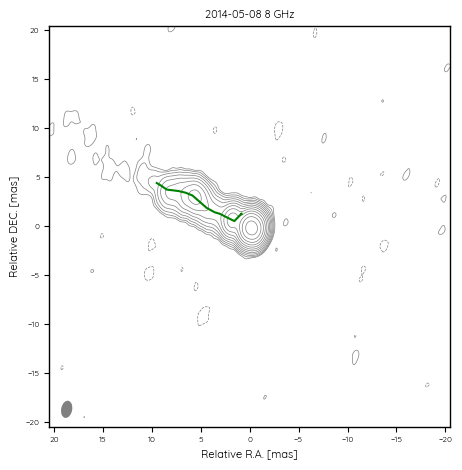

In [8]:
#Let's also have a look at the second method that is implemented, called "polar",
#This method converts the image to polar coordinates and performs a gaussian fit for every azimuthal slice
#This method currently only works without counterjet

data=data.center()

#sometimes this method can be problematic in the inner region close to the jet, so you can define a start_radius in mas where to begin the fit
start_radius=1.5 #mas

#Let's give it a try:
ridgeline, _ = data.get_ridgeline("polar",start_radius=start_radius)

#let's plot it
data.plot(plot_ridgeline=True,ridgeline_color="green")

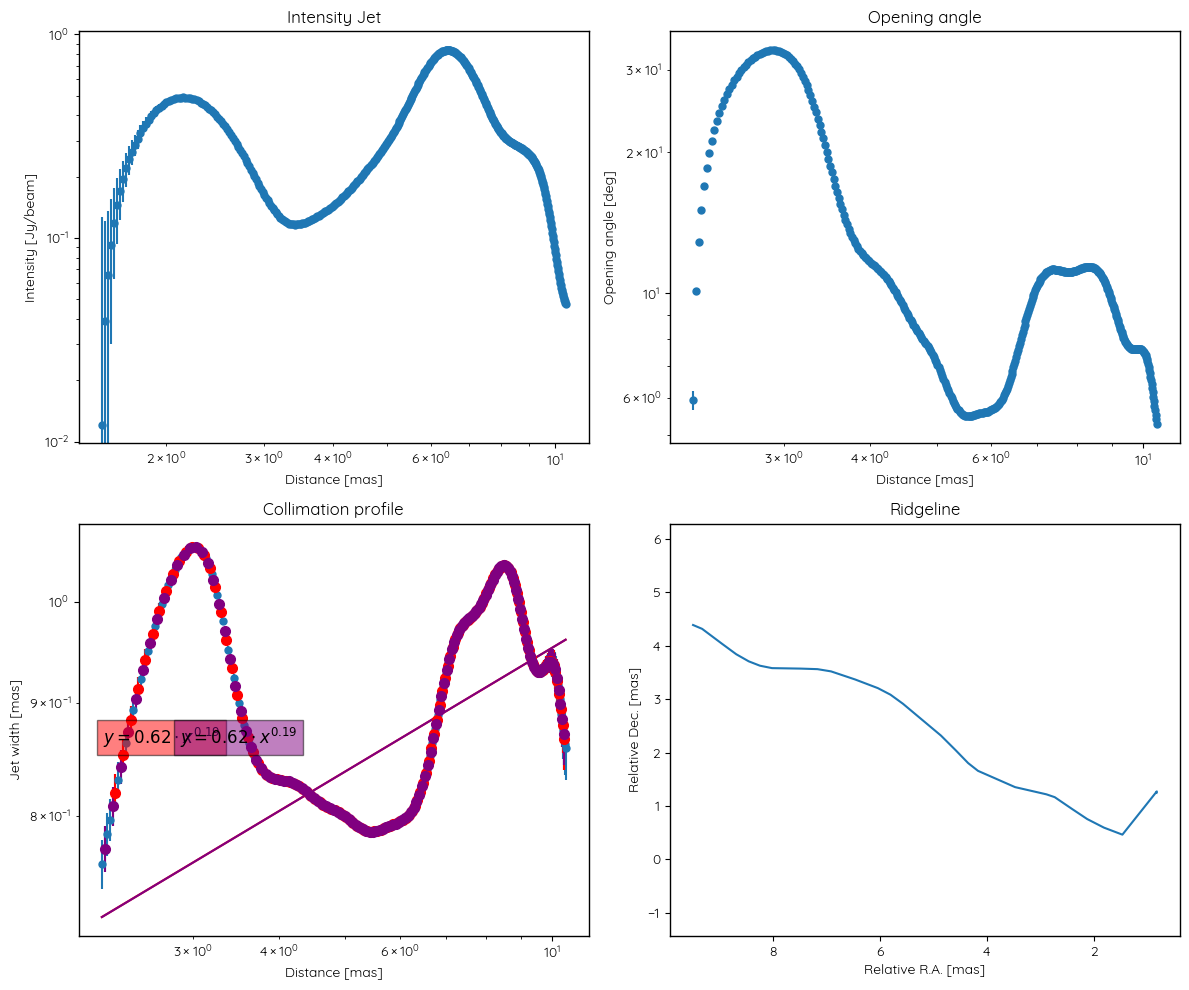

In [10]:
#Let's create the same ridgeline plots as before for comparison with the 'slices' method:

#For better visibility, we will arrange them in a 2x2 subplot grid using matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(12,10))

#Flux profile
ridgeline.plot("intensity",fig=fig,ax=ax[0,0],show=False)

#opening angle
ridgeline.plot("open_angle",fig=fig,ax=ax[0,1],show=False)

#jet width/collimation profile, including fits
ridgeline.plot("width",fig=fig,ax=ax[1,0],fit=True,show=False)

#ridgeline itself
ridgeline.plot("ridgeline",fig=fig,ax=ax[1,1],show=False)

#and finally display all the plots
plt.tight_layout()
plt.show()